# Esercizio 6.1

Stima di grandezze relative al modello di Ising monodimensionale, valutate al variare della temperatura, sfruttando l'algoritmo di Metropolis con campionamento standard e alla Gibbs.

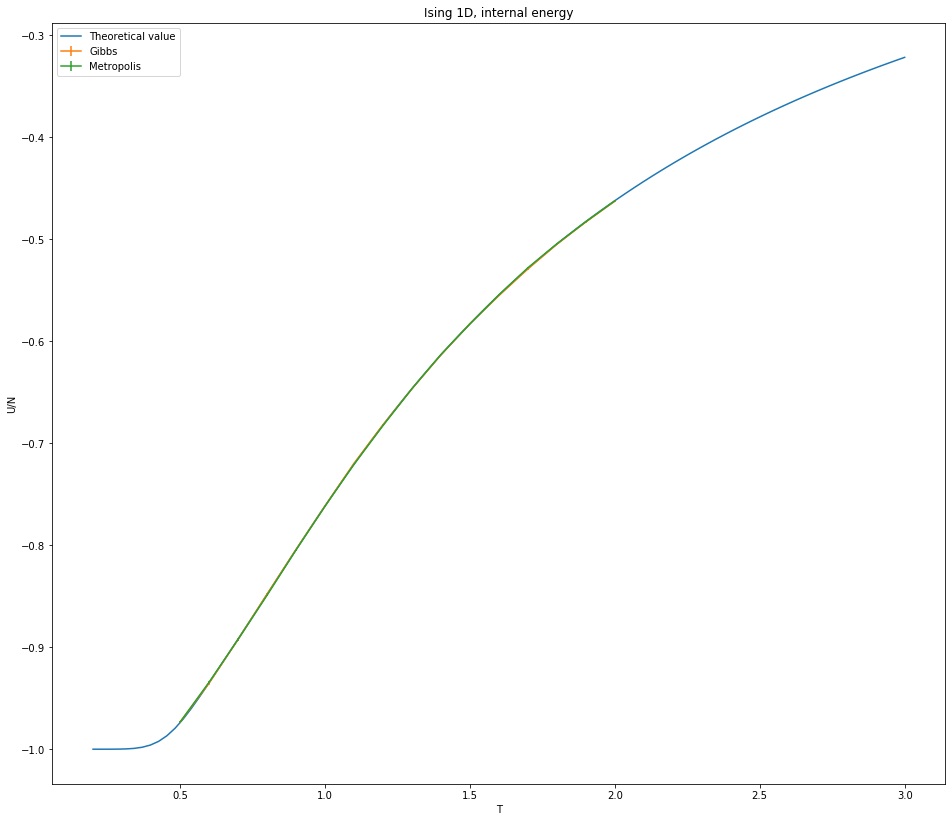

In [1]:
print(ene_solid)


points=100
T = np.linspace(0.2,3.0,num=points)
T1 = np.linspace(0.5,2.0,num=16)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )


ene_Gibbs = np.loadtxt("graph.ene.Gibbs.dat")
heat_Gibbs = np.loadtxt("graph.heat.Gibbs.dat")
mag_Gibbs = np.loadtxt("graph.mag.Gibbs.dat")
chi_Gibbs = np.loadtxt("graph.chi.Gibbs.dat")
ene_Metropolis = np.loadtxt("graph.ene.Metropolis.dat")
heat_Metropolis = np.loadtxt("graph.heat.Metropolis.dat")
mag_Metropolis = np.loadtxt("graph.mag.Metropolis.dat")
chi_Metropolis = np.loadtxt("graph.chi.Metropolis.dat")

fig=plt.figure(figsize=(16, 14))
plt.plot(T, e, label="Theoretical value")
plt.errorbar(T1, ene_Gibbs[:,2], ene_Gibbs[:,3], label="Gibbs")
plt.errorbar(T1, ene_Metropolis[:,2], ene_Metropolis[:,3], label="Metropolis")
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend(loc="best")
plt.show()



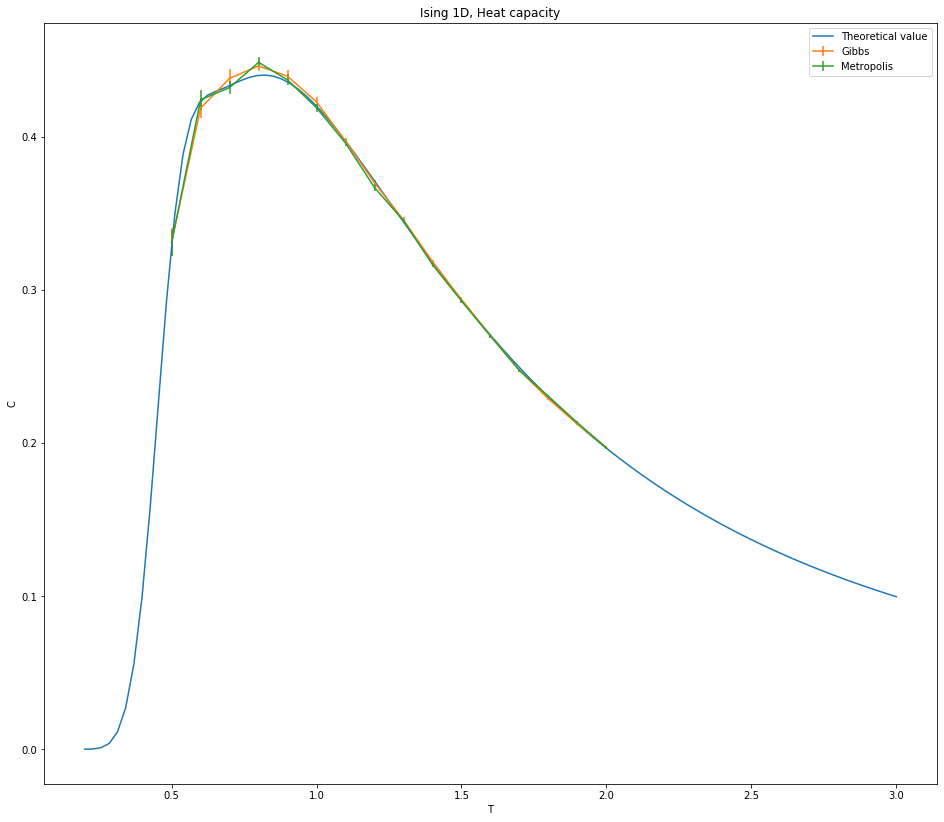

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

fig=plt.figure(figsize=(16, 14))
plt.plot(T, heat, label="Theoretical value")
plt.errorbar(T1, heat_Gibbs[:,2], heat_Gibbs[:,3], label="Gibbs")
plt.errorbar(T1, heat_Metropolis[:,2], heat_Metropolis[:,3], label="Metropolis")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend(loc="best")
plt.show()



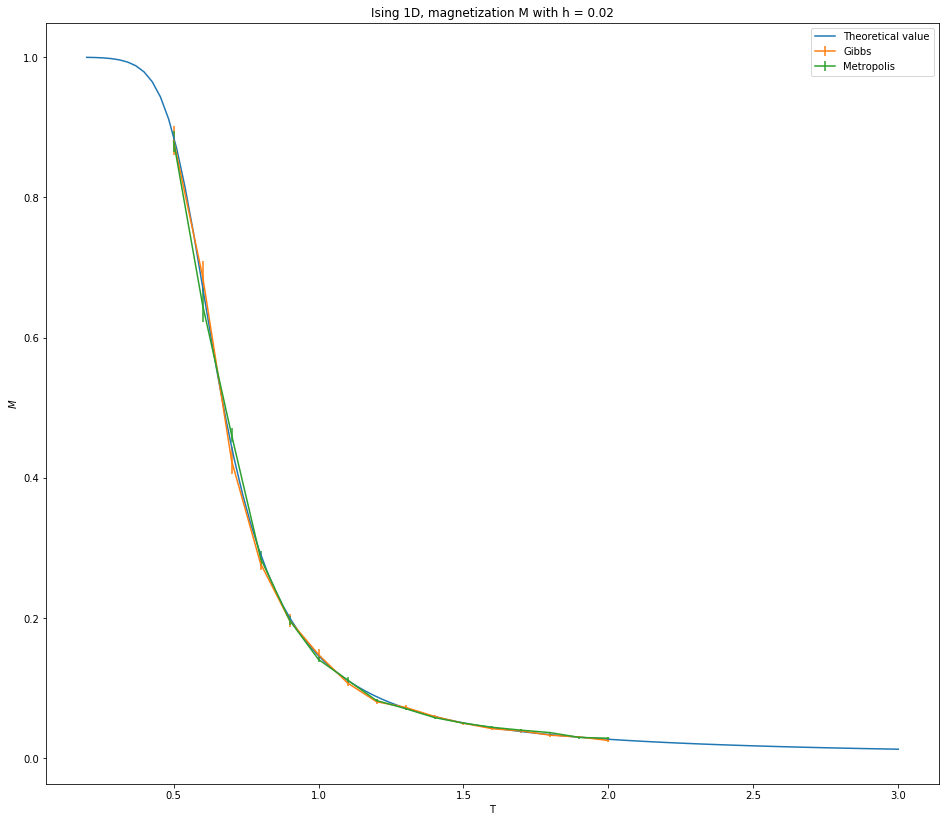

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

fig=plt.figure(figsize=(16, 14))
plt.plot(T, M, label="Theoretical value")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.errorbar(T1, mag_Gibbs[:,2], mag_Gibbs[:,3], label="Gibbs")
plt.errorbar(T1, mag_Metropolis[:,2], mag_Metropolis[:,3], label="Metropolis")
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend(loc="best")
plt.show()

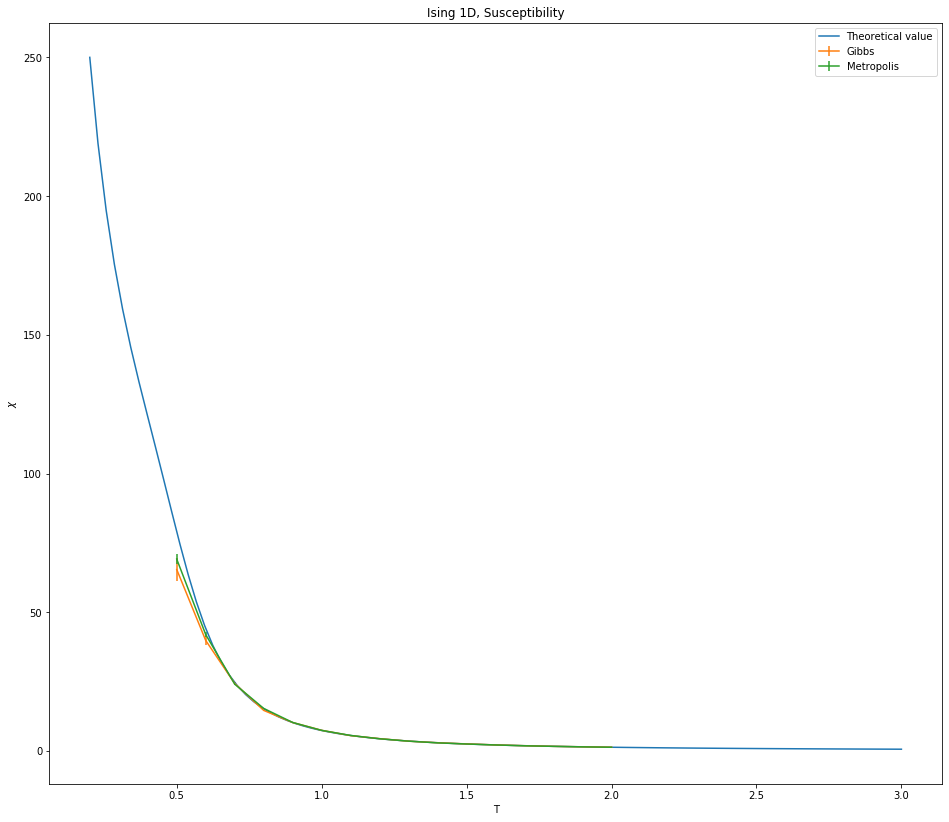

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


fig=plt.figure(figsize=(16, 14))
plt.plot(T, X, label="Theoretical value")
plt.title('Ising 1D, Susceptibility')
plt.errorbar(T1, chi_Gibbs[:,2], chi_Gibbs[:,3], label="Gibbs")
plt.errorbar(T1, chi_Metropolis[:,2], chi_Metropolis[:,3], label="Metropolis")
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend(loc="best")
plt.show()